In [1]:
# CS 770 - Spring 2025
# Assignment 3 - Due 02 May 2025
# Logan Schraeder - x356t577

In [2]:
# Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [3]:
# Import Fashion MNIST
from tensorflow.keras.datasets import fashion_mnist

**EDA and Preprocessing**

In [4]:
from re import X
# Sample and visualize data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

# EDA Function
def display_random_images(num_images):
       """Displays a random number of images from the Fashion MNIST dataset."""
       # Generate random indices
       indices = np.random.choice(len(X_train), num_images, replace=False)
       # Select images and labels
       images = X_train[indices]
       labels = y_train[indices]
       # Create a figure and axes
       fig, axes = plt.subplots(1, num_images, figsize=(num_images * 2, 2))
       # Plot the images
       for i, ax in enumerate(axes):
           ax.imshow(images[i], cmap='gray')
           ax.set_title(f'Label: {labels[i]}')
           ax.axis('off')
       # Show the plot
       plt.show()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


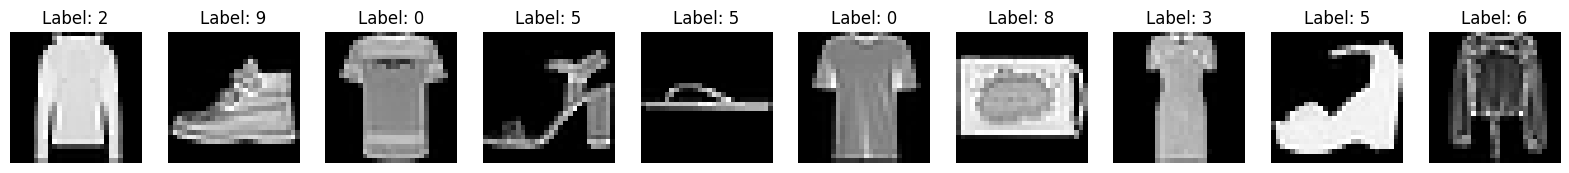

In [5]:
# Sample 10 random pictures from the dataset
display_random_images(10)

In [6]:
# Scale images to have [0,1] pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [7]:
# Create testing, training, and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

**Model Creation**

In [8]:
# Create a TF shallow neural network
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.Input(shape=(28,28)))                   # Input layer set to accept 28x28 images
model_1.add(tf.keras.layers.Flatten())                       # Add a flattening layer to convert the 2D input to 1D
model_1.add(tf.keras.layers.Dense(128, activation='relu'))   # ReLU fully connected hidden layer
model_1.add(tf.keras.layers.Dense(10, activation='softmax')) # Softmax classification output layer, for 10 classes
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Create a basic CNN
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.Input(shape=(28,28,1)))                                  # Input layer set to accept 28x28 images
model_2.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu')) # Convolutional layer 1
model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))                    # Max pooling layer
model_2.add(tf.keras.layers.Flatten())                                        # Flatten layer
model_2.add(tf.keras.layers.Dense(128, activation='relu'))                    # ReLU fully connected hidden layer
model_2.add(tf.keras.layers.Dense(10, activation='softmax'))                  # Softmax classification output layer
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Create a deeper CNN
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.Input(shape=(28,28,1)))                                  # Input layer
model_3.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu')) # Convolutional layer 1
model_3.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))                    # Max pooling layer
model_3.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu')) # Convolutional layer 2
model_3.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))                    # Max pooling layer
model_3.add(tf.keras.layers.Flatten())                                        # Flatten layer
model_3.add(tf.keras.layers.Dense(128, activation='relu'))                    # ReLU fully connected hidden layer
model_3.add(tf.keras.layers.Dropout(0.5))                                     # Dropout layer
model_3.add(tf.keras.layers.Dense(64, activation='relu'))                     # ReLU fully connected hidden layer
model_3.add(tf.keras.layers.Dense(10, activation='softmax'))                  # Softmax classification output layer
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

**Model Training**

In [11]:
# Train each model and collect loss, accuracy, and time to train
start_time = time.time()
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
end_time = time.time()
model_1_time = end_time - start_time
print(f"Model 1 training time: {model_1_time:.2f} seconds")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7708 - loss: 0.6563 - val_accuracy: 0.8356 - val_loss: 0.4630
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8569 - loss: 0.4007 - val_accuracy: 0.8638 - val_loss: 0.3827
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8715 - loss: 0.3499 - val_accuracy: 0.8686 - val_loss: 0.3613
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8831 - loss: 0.3177 - val_accuracy: 0.8798 - val_loss: 0.3370
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8932 - loss: 0.2939 - val_accuracy: 0.8789 - val_loss: 0.3326
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8950 - loss: 0.2776 - val_accuracy: 0.8753 - val_loss: 0.3462
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8994 - loss: 0.2699 - val_accuracy: 0.8811 - val_loss: 0.3292
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9052 - loss: 0.2551 - 

In [12]:
start_time = time.time()
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
end_time = time.time()
model_2_time = end_time - start_time
print(f"Model 2 training time: {model_2_time:.2f} seconds")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7992 - loss: 0.5755 - val_accuracy: 0.8869 - val_loss: 0.3159
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8926 - loss: 0.2982 - val_accuracy: 0.8947 - val_loss: 0.2859
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9104 - loss: 0.2444 - val_accuracy: 0.9004 - val_loss: 0.2729
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9245 - loss: 0.2094 - val_accuracy: 0.9071 - val_loss: 0.2655
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9336 - loss: 0.1807 - val_accuracy: 0.9077 - val_loss: 0.2515
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9445 - loss: 0.1526 - val_accuracy: 0.9139 - val_loss: 0.2526
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9519 - loss: 0.1334 - val_accuracy: 0.9123 - val_loss: 0.2572
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9598 - loss: 0.1130 - 

In [13]:
start_time = time.time()
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_3.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
end_time = time.time()
model_3_time = end_time - start_time
print(f"Model 3 training time: {model_3_time:.2f} seconds")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6880 - loss: 0.8446 - val_accuracy: 0.8547 - val_loss: 0.3929
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8522 - loss: 0.4136 - val_accuracy: 0.8863 - val_loss: 0.3070
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8741 - loss: 0.3437 - val_accuracy: 0.8952 - val_loss: 0.2850
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8874 - loss: 0.3033 - val_accuracy: 0.9018 - val_loss: 0.2700
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8965 - loss: 0.2834 - val_accuracy: 0.8995 - val_loss: 0.2700
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9062 - loss: 0.2581 - val_accuracy: 0.9053 - val_loss: 0.2537
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9103 - loss: 0.2404 - val_accuracy: 0.9075 - val_loss: 0.2579
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9161 - loss: 0.2264 -

In [14]:
# Create a committee for classification based on a three-model average
def committee_classification(X):
    y_pred_1 = model_1.predict(X)
    y_pred_2 = model_2.predict(X)
    y_pred_3 = model_3.predict(X)
    y_pred = (y_pred_1 + y_pred_2 + y_pred_3) / 3
    return y_pred


**Model Evaluation**

In [15]:
# Test Models on test data with accuracy statistics
model_1_loss, model_1_accuracy = model_1.evaluate(X_test, y_test)
print(f"Model 1 Test Loss: {model_1_loss:.4f}")
print(f"Model 1 Test Accuracy: {model_1_accuracy:.4f}")

model_2_loss, model_2_accuracy = model_2.evaluate(X_test, y_test)
print(f"Model 2 Test Loss: {model_2_loss:.4f}")
print(f"Model 2 Test Accuracy: {model_2_accuracy:.4f}")

model_3_loss, model_3_accuracy = model_3.evaluate(X_test, y_test)
print(f"Model 3 Test Loss: {model_3_loss:.4f}")
print(f"Model 3 Test Accuracy: {model_3_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8813 - loss: 0.3402
Model 1 Test Loss: 0.3400
Model 1 Test Accuracy: 0.8810
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9061 - loss: 0.3310
Model 2 Test Loss: 0.3135
Model 2 Test Accuracy: 0.9087
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9104 - loss: 0.2603
Model 3 Test Loss: 0.2526
Model 3 Test Accuracy: 0.9103


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
---Model 1 Confusion Matrix---
[[832   2  16  23   2   2 117   0   6   0]
 [  3 969   0  21   3   0   2   0   2   0]
 [ 14   1 765  16  92   0 110   0   2   0]
 [ 21   3  10 901  30   0  31   0   4   0]
 [  0   1 107  33 777   0  81   0   1   0]
 [  0   0   0   0   0 960   0  33   0   7]
 [111   0  68  28  56   0 725   0  12   0]
 [  0   0   0   0   0  12   0 970   0  18]
 [  6   0   3   3   7   2   7   4 968   0]
 [  2   0   0   0   0  11   1  43   0 943]]
---Model 1 Classification Report---
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.77      0.78      1000
           3       0.88      0.90      

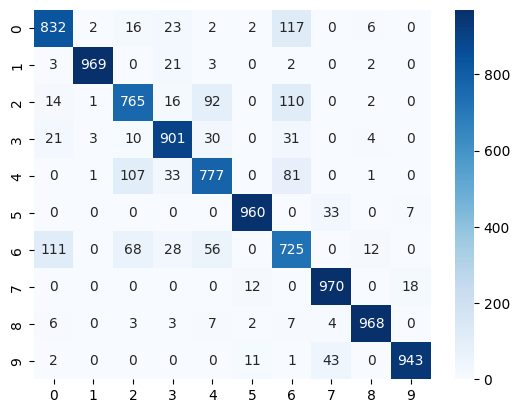

In [16]:
# Create confusion matricies & classification reports
from sklearn.metrics import confusion_matrix, classification_report
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)
y_pred_3 = model_3.predict(X_test)
y_pred_committee = committee_classification(X_test)

print("---Model 1 Confusion Matrix---")
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred_1, axis=1)))
sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred_1, axis=1)), annot=True, fmt='d', cmap='Blues')
print("---Model 1 Classification Report---")
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred_1, axis=1)))


---Model 2 Confusion Matrix---
[[832   0  28  29   7   2 101   0   1   0]
 [  0 976   2  14   5   0   3   0   0   0]
 [ 13   0 896  10  28   2  51   0   0   0]
 [  5   3   9 933  23   0  25   0   2   0]
 [  1   0  92  31 821   1  53   0   1   0]
 [  0   0   0   0   0 985   0  12   0   3]
 [ 84   0  69  38  51   0 752   0   6   0]
 [  0   0   0   0   0  10   0 979   0  11]
 [  6   0   4   8   3   4   7   3 964   1]
 [  1   0   0   0   0   8   0  42   0 949]]
---Model 2 Classification Report---
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.81      0.90      0.85      1000
           3       0.88      0.93      0.90      1000
           4       0.88      0.82      0.85      1000
           5       0.97      0.98      0.98      1000
           6       0.76      0.75      0.76      1000
           7       0.94      0.98      0.96      1000
           8   

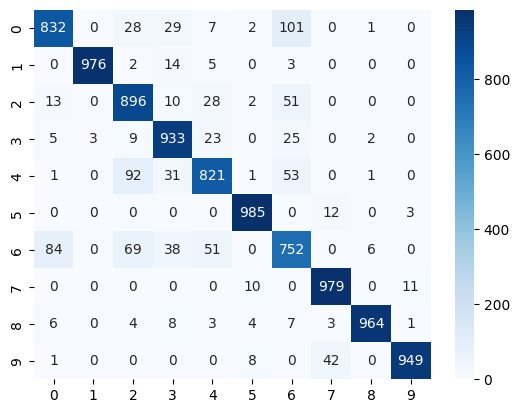

In [17]:
print("---Model 2 Confusion Matrix---")
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred_2, axis=1)))
sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred_2, axis=1)), annot=True, fmt='d', cmap='Blues')
print("---Model 2 Classification Report---")
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred_2, axis=1)))

---Model 3 Confusion Matrix---
[[868   0  19  13   1   1  93   0   5   0]
 [  1 979   0  15   1   0   1   0   3   0]
 [ 14   0 870   7  41   0  66   0   2   0]
 [ 15   1   9 923  13   0  37   0   1   1]
 [  1   0  54  46 830   0  69   0   0   0]
 [  0   0   0   0   0 977   0  17   0   6]
 [112   1  68  22  54   0 731   0  12   0]
 [  0   0   0   0   0   4   0 981   0  15]
 [  1   1   5   3   3   2   4   1 980   0]
 [  0   0   0   0   0   5   0  31   0 964]]
---Model 3 Classification Report---
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.85      0.87      0.86      1000
           3       0.90      0.92      0.91      1000
           4       0.88      0.83      0.85      1000
           5       0.99      0.98      0.98      1000
           6       0.73      0.73      0.73      1000
           7       0.95      0.98      0.97      1000
           8   

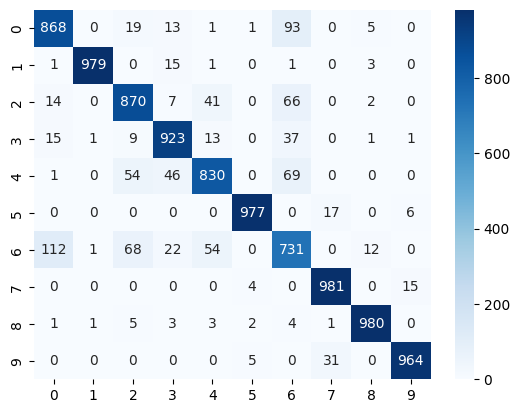

In [18]:
print("---Model 3 Confusion Matrix---")
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred_3, axis=1)))
sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred_3, axis=1)), annot=True, fmt='d', cmap='Blues')
print("---Model 3 Classification Report---")
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred_3, axis=1)))

---Committee Confusion Matrix---
[[877   0  22  12   2   1  84   0   2   0]
 [  1 976   0  16   3   0   2   0   2   0]
 [ 16   0 883  10  39   0  52   0   0   0]
 [  9   1   9 934  21   0  24   0   2   0]
 [  1   0  62  34 850   0  53   0   0   0]
 [  0   0   0   0   0 980   0  16   0   4]
 [ 95   0  54  27  54   0 762   0   8   0]
 [  0   0   0   0   0   4   0 983   0  13]
 [  4   0   6   3   3   1   1   3 979   0]
 [  1   0   0   0   0   4   0  33   0 962]]
---Committee Classification Report---
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1000
           1       1.00      0.98      0.99      1000
           2       0.85      0.88      0.87      1000
           3       0.90      0.93      0.92      1000
           4       0.87      0.85      0.86      1000
           5       0.99      0.98      0.98      1000
           6       0.78      0.76      0.77      1000
           7       0.95      0.98      0.97      1000
           

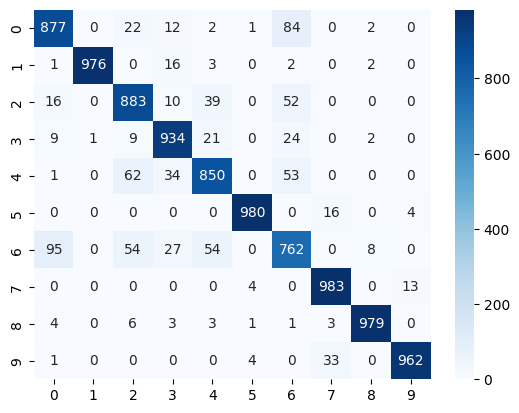

In [19]:
print("---Committee Confusion Matrix---")
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred_committee, axis=1)))
sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred_committee, axis=1)), annot=True, fmt='d', cmap='Blues')
print("---Committee Classification Report---")
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred_committee, axis=1)))

In [ ]:
# Bonus Task: Performance Enhancement
# Add an autoencoder ahead of the CNN to upsample the data
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)

encoded = layers.MaxPooling2D((2, 2), padding='same')(x) # Bottleneck is now 7x7x64

x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = layers.BatchNormalization()(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)

decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.5026 - loss: 0.0222 - val_accuracy: 0.5070 - val_loss: 0.0232
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.5093 - loss: 0.0053 - val_accuracy: 0.5078 - val_loss: 0.0039
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.5111 - loss: 0.0039 - val_accuracy: 0.5078 - val_loss: 0.0035
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.5099 - loss: 0.0032 - val_accuracy: 0.5078 - val_loss: 0.0033
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.5105 - loss: 0.0028 - val_accuracy: 0.5079 - val_loss: 0.0023
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.5096 - loss: 0.0024 - val_accuracy: 0.5079 - val_loss: 0.0026
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.5118 - loss: 0.0022 - val_accuracy: 0.5079 - val_loss: 0.0021
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.5103 - loss: 0.0020 - val_a

In [ ]:
# Evaluate autoencoder training


In [ ]:
# Run autoencoder in front of deep CNN
